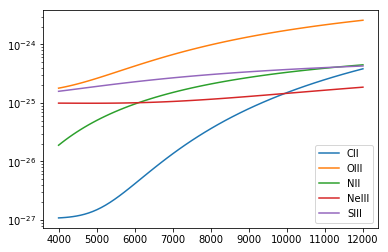

In [5]:
import cool_tigress as ct

E = ct.LineCoolElemEnum

T = np.logspace(np.log10(4000.0), np.log10(12000.0))
ne = 4000.0

# Cooling rate erg/s/H
plt.plot(T, ct.get_linecooling_5lv(E.CII, T, ne, 2.2e-4)/ne, label=E.CII.name)
plt.plot(T, ct.get_linecooling_5lv(E.OIII, T, ne, 3.3e-4)/ne, label=E.OIII.name)
#plt.plot(T, ct.get_linecooling_5lv(E.OII, T, ne, 3.3e-4)/ne, label=E.OII.name)
plt.plot(T, ct.get_linecooling_5lv(E.NII, T, ne, 4.0e-5)/ne, label=E.NII.name)
plt.plot(T, ct.get_linecooling_5lv(E.NeIII, T, ne, 4.0e-5)/ne, label=E.NeIII.name)
plt.plot(T, ct.get_linecooling_5lv(E.SIII, T, ne, 9.0e-6)/ne, label=E.SIII.name)
plt.yscale('log')
plt.legend(loc=4)

In [34]:
import cool_tigress as ct
Elem = ct.LineCoolElemEnum
Tran = ct.LineCoolTransitionEnum

A = dict()
for EE_ in Elem:
    A[EE_.name] = float(ct.get_A(EE_, Tran.T01))


{'NI': 7.566e-06,
 'NII': 2.077e-06,
 'OI': 8.865e-05,
 'OII': 4.124e-05,
 'OIII': 2.664e-05,
 'NeIII': 0.005974,
 'SII': 0.000632,
 'SIII': 0.000472,
 'CII': 2.321e-06,
 'CIII': 0.0,
 'NIII': 27659.5881240195,
 'NELEM_5LV': 27659.5881240195,
 'NeII': 70.06845694500001,
 'SIV': 227.3268213,
 'NELEM': 38574.6710609655}